In this notebook, we will:
* deal with the *GeoJSON* Files to create polygonal plots
* learn about projections and coordinate reference
* get practice spatially joining data

In [1]:
!pip install geopandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

GeoJSON is another type of files that we can use to store geospatial data and create geospatial visualizations. Unlike shapefiles, GeoJSON is a single file making it easier to work with.

The first lines (of many) of *nashville-neighborhoods.geojson* look like this,

```
"type":"Feature",
        "properties":{
      "name":"Historic Buena Vista"
      },"geometry":{
          "type":"MultiPolygon","coordinates":[[[[-86.79511056795417,36.17575964963348],[-86.79403325521203,36.176723819622765],[-86.79395847673587...
```

The properties are mapped to our geodataframe when reading using geopandas like this...

In [3]:
district_geo = gpd.read_file("../districts.geojson")
district_geo.head()

,amp_code,amp_th,amp_en,pro_code,pro_th,pro_en,reg_nesdb,reg_royin,perimeter,area_sqkm,geometry
0,9015,สิงหนคร,Singhanakhon,90,สงขลา,Songkhla,South,South,72.908500,242.316953,"MULTIPOLYGON (((100.55980 7.25212, 100.57921 7..."
1,5307,พิชัย,Phichai,53,อุตรดิตถ์,Uttaradit,UpperNorth,North,142.230752,696.360661,"MULTIPOLYGON (((100.24898 17.25566, 100.25330 ..."
2,9016,คลองหอยโข่ง,Khlong Hoi Khong,90,สงขลา,Songkhla,South,South,85.990583,303.232680,"MULTIPOLYGON (((100.38452 6.82866, 100.37891 6..."
3,5308,ลับแล,Laplae,53,อุตรดิตถ์,Uttaradit,UpperNorth,North,126.116540,467.415328,"MULTIPOLYGON (((100.07131 17.59238, 100.07699 ..."
4,9013,ควนเนียง,Khuan Niang,90,สงขลา,Songkhla,South,South,75.657535,247.904319,"MULTIPOLYGON (((100.46056 7.18613, 100.45073 7..."


Geopandas is installed with some dependencies that makes it easy to deal with:
* the vector data which is the geospatial data made up of points, lines and polygons. This is dealt by *fiona* which is a python API for *OGR* (Open GIS Reference). We will deal with vector graphics through these notebooks.
* the raster data can be thought as grid maps. This is dealt by *GDAL*.

### Colormaps and legends for geopandas plots

We can specify a qualitative (categorial) color map (paletted) using the `cmap` argument in the `plot` method of the `GeoDataFrame`. We can also modify some properties of the legend of the mapped colors using the `legend_kwds` argument.


```python
provinces_geo.plot(
    column = "Province Eng Name",
    legend = True,
    cmap = "Set3",
    legend_kwds = {
        "title": "Provinces in Thailand",
        "loc": "upper left",
        "bbox_to_anchor": (1, 1.03),
        "ncol": 3
    }
)
```

In [7]:
provinces_geo = gpd.read_file("../provinces.geojson")
provinces_geo.head()

,pro_code,pro_th,pro_en,reg_nesdb,reg_royin,perimeter,area_sqkm,geometry
0,56,พะเยา,Phayao,UpperNorth,North,442.838839,6189.635950,"MULTIPOLYGON (((100.27194 18.81875, 100.23968 ..."
1,57,เชียงราย,Chiang Rai,UpperNorth,North,668.416725,11583.012365,"MULTIPOLYGON (((99.53646 19.16314, 99.55039 19..."
2,54,แพร่,Phrae,UpperNorth,North,515.746817,6484.532497,"MULTIPOLYGON (((99.49711 17.77145, 99.48698 17..."
3,55,น่าน,Nan,UpperNorth,North,674.017891,12165.114094,"MULTIPOLYGON (((100.55240 18.03491, 100.55055 ..."
4,63,ตาก,Tak,LowwerNorth,West,1350.975407,17318.857031,"MULTIPOLYGON (((99.10549 16.04960, 99.08806 16..."


<Axes: >

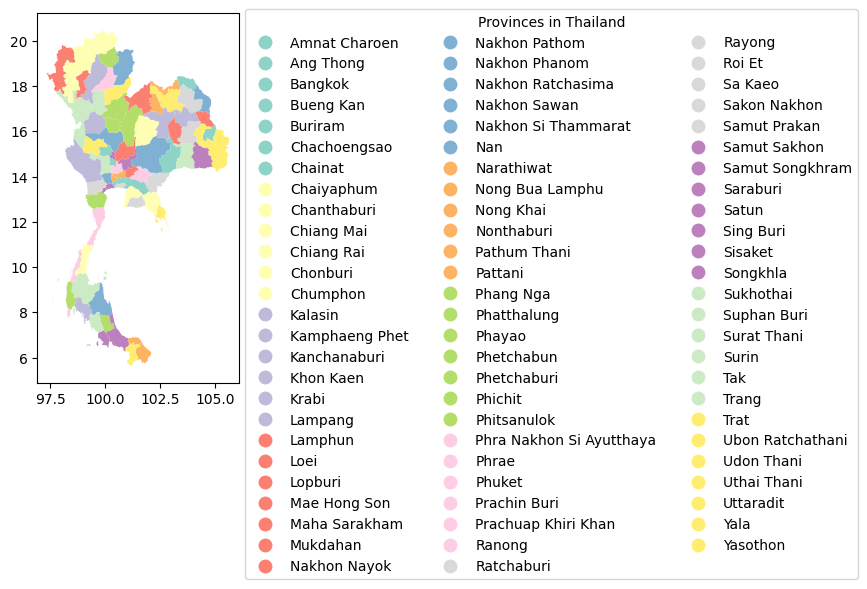

In [10]:
provinces_geo.plot(
    column = "pro_en",
    legend = True,
    cmap = "Set3",
    legend_kwds = {
        "title": "Provinces in Thailand",
        "loc": "upper left",
        "bbox_to_anchor": (1, 1.03),
        "ncol": 3
    }
)

In [14]:
subdistrics_geo = gpd.read_file("../subdistricts.geojson")
subdistrics_geo = subdistrics_geo[subdistrics_geo['pro_en'] == 'Surat Thani']
subdistrics_geo.head()

,tam_code,tam_th,tam_en,amp_code,amp_th,amp_en,pro_code,pro_th,pro_en,reg_nesdb,reg_royin,perimeter,area_sqkm,geometry
6567,840101,ตลาด,Talat,8401,เมืองสุราษฎร์ธาน,Mueang Surat Thani,84,สุราษฎร์ธานี,Surat Thani,South,South,19.802909,5.227275,"MULTIPOLYGON (((99.30492 9.12837, 99.30918 9.1..."
6568,840102,มะขามเตี้ย,Makham Tia,8401,เมืองสุราษฎร์ธาน,Mueang Surat Thani,84,สุราษฎร์ธานี,Surat Thani,South,South,43.290125,54.342181,"MULTIPOLYGON (((99.37516 9.13447, 99.36778 9.1..."
6569,840103,วัดประดู่,Wat Pradu,8401,เมืองสุราษฎร์ธาน,Mueang Surat Thani,84,สุราษฎร์ธานี,Surat Thani,South,South,55.255334,67.386300,"MULTIPOLYGON (((99.30287 9.11888, 99.30690 9.1..."
6570,840104,ขุนทะเล,Khun Thale,8401,เมืองสุราษฎร์ธาน,Mueang Surat Thani,84,สุราษฎร์ธานี,Surat Thani,South,South,41.505520,83.153529,"MULTIPOLYGON (((99.38393 9.06007, 99.39223 9.0..."
6571,840105,บางใบไม้,Bang Bai Mai,8401,เมืองสุราษฎร์ธาน,Mueang Surat Thani,84,สุราษฎร์ธานี,Surat Thani,South,South,18.690749,14.741503,"MULTIPOLYGON (((99.31120 9.16149, 99.30532 9.1..."


<Axes: >

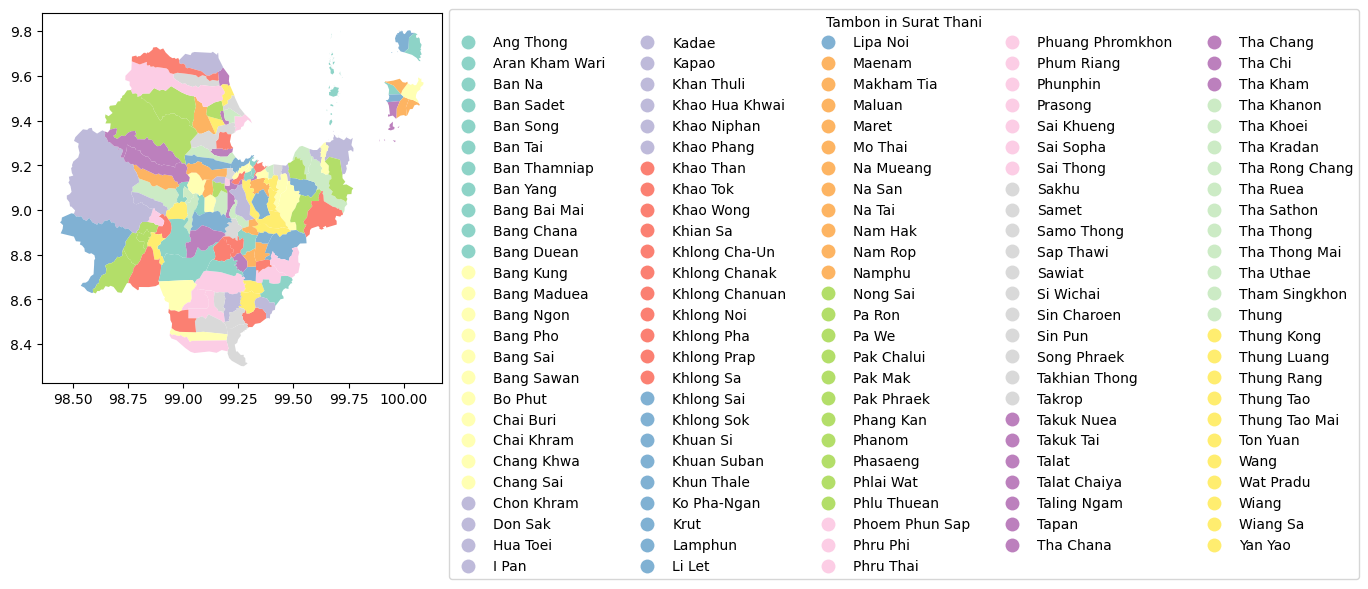

In [15]:
subdistrics_geo.plot(
    column = "tam_en",
    legend = True,
    cmap = "Set3",
    legend_kwds = {
        "title": "Tambon in Surat Thani",
        "loc": "upper left",
        "bbox_to_anchor": (1, 1.03),
        "ncol": 5
    }
)

In [16]:
reg_geo = gpd.read_file("../reg_nesdb.geojson")
reg_geo.head()

,reg_nesdb,perimeter,area_sqkm,geometry
0,East,1756.077130,36574.199489,"MULTIPOLYGON (((102.24683 12.16335, 102.24900 ..."
1,UpperNorth,2236.672099,96112.568640,"MULTIPOLYGON (((100.24898 17.25566, 100.25330 ..."
2,LowwerNorth,2500.566002,75941.943560,"MULTIPOLYGON (((100.03798 15.29142, 100.02051 ..."
3,Northeast,2484.740108,166935.074162,"MULTIPOLYGON (((103.40996 14.36963, 103.41269 ..."
4,West,1729.260681,46028.301441,"MULTIPOLYGON (((99.50140 11.03954, 99.49818 11..."


In [18]:
surat_subdistrict_in_Thailand_in_districts = gpd.sjoin(
    subdistrics_geo,
    reg_geo,
    predicate = "within"
)
surat_subdistrict_in_Thailand_in_districts.head(5)

,tam_code,tam_th,tam_en,amp_code,amp_th,amp_en,pro_code,pro_th,pro_en,reg_nesdb_left,reg_royin,perimeter_left,area_sqkm_left,geometry,index_right,reg_nesdb_right,perimeter_right,area_sqkm_right
6567,840101,ตลาด,Talat,8401,เมืองสุราษฎร์ธาน,Mueang Surat Thani,84,สุราษฎร์ธานี,Surat Thani,South,South,19.802909,5.227275,"MULTIPOLYGON (((99.30492 9.12837, 99.30918 9.1...",6,South,4230.261974,72941.527121
6568,840102,มะขามเตี้ย,Makham Tia,8401,เมืองสุราษฎร์ธาน,Mueang Surat Thani,84,สุราษฎร์ธานี,Surat Thani,South,South,43.290125,54.342181,"MULTIPOLYGON (((99.37516 9.13447, 99.36778 9.1...",6,South,4230.261974,72941.527121
6569,840103,วัดประดู่,Wat Pradu,8401,เมืองสุราษฎร์ธาน,Mueang Surat Thani,84,สุราษฎร์ธานี,Surat Thani,South,South,55.255334,67.386300,"MULTIPOLYGON (((99.30287 9.11888, 99.30690 9.1...",6,South,4230.261974,72941.527121
6570,840104,ขุนทะเล,Khun Thale,8401,เมืองสุราษฎร์ธาน,Mueang Surat Thani,84,สุราษฎร์ธานี,Surat Thani,South,South,41.505520,83.153529,"MULTIPOLYGON (((99.38393 9.06007, 99.39223 9.0...",6,South,4230.261974,72941.527121
6571,840105,บางใบไม้,Bang Bai Mai,8401,เมืองสุราษฎร์ธาน,Mueang Surat Thani,84,สุราษฎร์ธานี,Surat Thani,South,South,18.690749,14.741503,"MULTIPOLYGON (((99.31120 9.16149, 99.30532 9.1...",6,South,4230.261974,72941.527121
